In [8]:
from collections import namedtuple
import numpy as np
import random
from collections import Counter

#팩 확률
PACK = namedtuple('PACK', ['star_1', 'star_2', 'star_3', 'star_4', 'star_5'])

PACKS = {
    'ALL_PACK': PACK(0.20, 0.59, 0.9375, 0.9875, 1),
    'TEAM_PACK': PACK(0.24, 0.64, 0.999, 0.999, 1),
    'HIGH_PACK': PACK(0, 0, 0.86, 0.97, 1),
    'COM_PACK': PACK(0, 0, 0.77, 0.97, 1)
}

#팩 구성
ALL_REQ = {
    'star_1': 2760,
    'star_2': 5530,
    'star_3': 5530,
    'star_4': 860,
    'star_5': 250
}

TEAM_REQ = {
    'star_1': 280,
    'star_2': 540,
    'star_3': 550,
    'star_4': 0,
    'star_5': 100
}

HIGH_REQ = {
    'star_1': 0,
    'star_2': 0,
    'star_3': 2060,
    'star_4': 360,
    'star_5': 150
}

COM_REQ = {
    'star_1': 0,
    'star_2': 0,
    'star_3': 660,
    'star_4': 500,
    'star_5': 100
}       
        

#가중치(21:7:1:1)
k = 8
daily_all = 1800
daily_team = 200
daily_high = 100
daily_com = 100

#오픈 횟수
all_open_count = daily_all*k
team_open_count = daily_team*k
high_open_count = daily_high*k
com_open_count = daily_com*k

#팩 오픈 정의
def open_pack(open_count, param):
    get = {'star_1': 0, 'star_2': 0, 'star_3': 0, 'star_4': 0, 'star_5': 0}
    star_1, star_2, star_3, star_4, star_5 = param
    
    for count in np.arange(open_count):
        probability = random.random()
        if probability < star_1:
            get['star_1'] += 1
        elif probability < star_2:
            get['star_2'] += 1
        elif probability < star_3:
            get['star_3'] += 1
        elif probability < star_4:
            get['star_4'] += 1
        else:
            get['star_5'] += 1
            
    return get

#획득치(get) 계산
all_dic = open_pack(all_open_count, PACKS['ALL_PACK'])
team_dic = open_pack(team_open_count, PACKS['TEAM_PACK'])
high_dic = open_pack(high_open_count, PACKS['HIGH_PACK'])
com_dic = open_pack(com_open_count, PACKS['COM_PACK'])

#획득치 음수 계산
dics = [all_dic, team_dic, high_dic, com_dic]

for dic in dics:
    for key, value in dic.items():
        dic[key] = -1*value
        

#획득 가능 수량에서 획득치 차감
all_remain = Counter()
all_remain.update(Counter(ALL_REQ))
all_remain.update(Counter(all_dic))
all_remain_final = dict(all_remain)

team_remain = Counter()
team_remain.update(Counter(TEAM_REQ))
team_remain.update(Counter(team_dic))
team_remain_final = dict(team_remain)

high_remain = Counter()
high_remain.update(Counter(HIGH_REQ))
high_remain.update(Counter(high_dic))
high_remain_final = dict(high_remain)

com_remain = Counter()
com_remain.update(Counter(COM_REQ))
com_remain.update(Counter(com_dic))
com_remain_final = dict(com_remain)

#전체 수량에서 획득치 차감
remain = {'star_1':2760, 'star_2':5530, 'star_3':5530, 'star_4':860, 'star_5':250}

total_remain = Counter()
total_remain.update(Counter(remain))
total_remain.update(Counter(all_dic))
total_remain.update(Counter(team_dic))
total_remain.update(Counter(high_dic))
total_remain.update(Counter(com_dic))

total_remain_final = dict(total_remain)

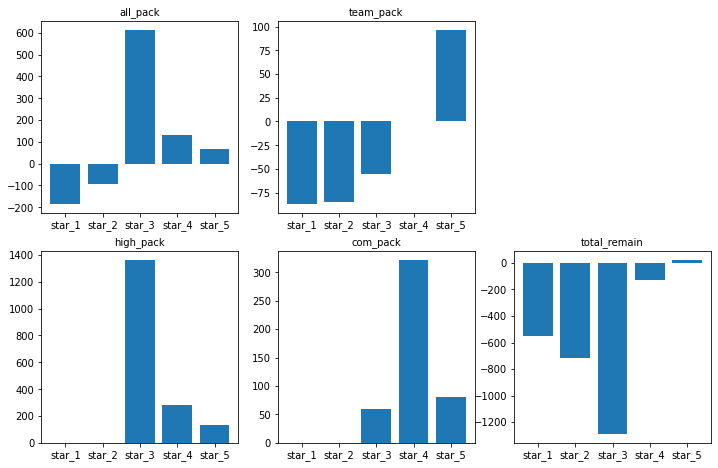

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.subplot(331)
plt.bar(all_remain_final.keys(), all_remain_final.values())
plt.title('all_pack', fontsize=10)
 
plt.subplot(332)
plt.bar(team_remain_final.keys(), team_remain_final.values())
plt.title('team_pack', fontsize=10)
 
plt.subplot(334)
plt.bar(high_remain_final.keys(), high_remain_final.values())
plt.title('high_pack', fontsize=10)
 
plt.subplot(335)
plt.bar(com_remain_final.keys(), com_remain_final.values())
plt.title('com_pack', fontsize=10)

plt.subplot(336)
plt.bar(total_remain_final.keys(), total_remain_final.values())
plt.title('total_remain', fontsize=10)
 
plt.show()